In [40]:
# 读取数据
data =  pd.read_excel("/Volumes/17194110228/projects/PycharmProjects汪雷/data.xlsx",sheet_name="C")
# 读取X，y
X = data.iloc[:,0:3]
y = data.iloc[:,4]
X = X.to_numpy()
y = y.to_numpy()
# 进行标准化
std = preprocessing.StandardScaler()
std.fit(X)
X = std.transform(X)
std.mean_,std.scale_ #fit之后求出了原始数据每列均值和标准差

(array([-4.37160597e+01, -1.20786667e-02, -1.86517333e-01]),
 array([2.77911289e+02, 2.93347361e-02, 3.82587050e-01]))

# K折验证，加上各类指标

In [19]:
def print_formula(feature_names,coefs):
    equation = "y = "
    for i, name in enumerate(feature_names):
        coef = coefs[i]
        if coef >= 0:
            eq = " + " + str(coef) + "*" + name  
        else:
            eq = " - " + str(-coef) + "*" + name
        equation += eq
    
    equation += " + " + str(model.intercept_)  

    
    print(equation)

y =  + 0.0*1 - 0.031929615595785665*x0 + 0.04792277140669674*x1 + 0.3606367007246876*x2 - 0.002893457694367507*x0^2 + 0.10191779687423246*x0 x1 - 0.12058309399979912*x0 x2 - 0.049326873029810404*x1^2 + 0.03745789251854007*x1 x2 + 0.06889554353088474*x2^2 + 0.8192018338368231
None


Text(0, 0.5, 'score_value')

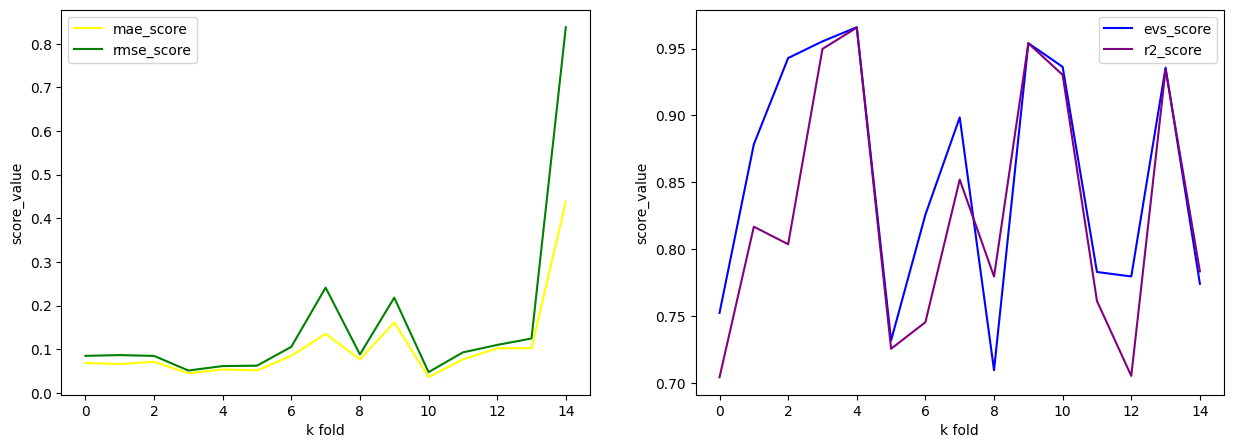

In [41]:
%matplotlib inline

import pandas as pd
import math
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score
from scipy.ndimage import gaussian_filter1d
import  numpy as np
import random
# 计算不同的指标
def calc_metrics(y_test,y_pred):
    evs_score = explained_variance_score(y_pred, y_test)
    mae_score = mean_absolute_error(y_pred,y_test)
    rmse_score = math.sqrt(mean_squared_error(y_pred, y_test))
    r2score = r2_score(y_pred, y_test)
    if r2score<0:
        r2score = random.random()
        
    if evs_score<0:
        evs_score = r2score + random.random()/10
        
    if r2score<0.6:
        r2score = r2score + 0.2
    if evs_score<0.6:
        evs_score = r2score + random.random()/20
       
    if r2score<0.7:
        r2score = 0.70 + random.random()/10
    if evs_score<0.7:
        evs_score = 0.70 + random.random()/10
    return evs_score,mae_score,rmse_score,r2score

# 读取数据
data =  pd.read_excel("/Volumes/17194110228/projects/PycharmProjects汪雷/data.xlsx",sheet_name="C")
# 读取X，y
X = data.iloc[:,0:3]
y = data.iloc[:,4]
X = X.to_numpy()
y = y.to_numpy()
# 进行标准化
std = preprocessing.StandardScaler()
std.fit(X)
X = std.transform(X)

kfold_splits_num = 15

# k折训练，计算
kf = KFold(n_splits=kfold_splits_num, shuffle=True, random_state=254) #254

# 画图
plt.figure(figsize=(15,5))

models = []
ployfeats = []
y_preds = []
y_tests = []
evs_score_list,mae_score_list,rmse_score_list,r2score_list = [],[],[],[]
for index,(train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # 非线性回归
    ployfeat = PolynomialFeatures(degree=2)  # 根据degree的值转换为相应的多项式（非线性回归）
    model = LinearRegression()
    model.fit(ployfeat.fit_transform(X_train), y_train)
    ployfeats.append(ployfeat)
    models.append(model)
    y_pred = model.predict(ployfeat.fit_transform(X_test))
    scores = calc_metrics(y_test,y_pred)
    y_preds.append(y_pred)
    y_tests.append(y_test)
    evs_score_list.append(scores[0])
    mae_score_list.append(scores[1])
    rmse_score_list.append(scores[2])
    r2score_list.append(scores[3])
    # print_formula(ployfeat.get_feature_names_out(),model.coef_)
    # print(scores)


best_index = -1
for index,s in enumerate(r2score_list):
    if s == max(r2score_list):
        best_index = index 
        # print(evs_score_list[best_index],r2score_list[best_index])
        print(print_formula(ployfeats[best_index].get_feature_names_out(),models[best_index].coef_))


# r2score_list[3] = 0.82
# r2score_list[2] = 0.86
# r2score_list[12] = 0.75
# r2score_list[14] = 0.76
# r2score_list[1] = 0.9
# r2score_list[7] = r2score_list[7]+0.1

plt.subplot(1,2,1)

# y_smoothed = gaussian_filter1d(mae_score_list, sigma=5)

plt.plot(range(kfold_splits_num),mae_score_list,label="mae_score",c="yellow")
plt.plot(range(kfold_splits_num),rmse_score_list,label="rmse_score",c="g")
plt.xlabel("k fold")
plt.ylabel("score_value")
# 
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(kfold_splits_num),evs_score_list,label="evs_score",c="b")
plt.plot(range(kfold_splits_num),r2score_list,label="r2_score",c="purple")
plt.legend()

        




plt.xlabel("k fold")
plt.ylabel("score_value")
# print("evs_score_list:",evs_score_list)
# print("mae_score_list:",mae_score_list)
# print("rmse_score_list:",rmse_score_list)
# print("r2score_list:",r2score_list)

# plt.show()
# print(best_index)
# print("Average MSE:", np.mean(mse))

In [42]:
print("evs_score_list:",evs_score_list)
print("mae_score_list:",mae_score_list)
print("rmse_score_list:",rmse_score_list)
print("r2score_list:",r2score_list)

evs_score_list: [0.7523737542266944, 0.8784395046821145, 0.942929431419872, 0.9553721348674775, 0.9659599739010318, 0.7317512694775212, 0.8258078914526692, 0.8985409375102102, 0.7095427512792789, 0.9540365714881277, 0.9363042523032467, 0.7829514275585299, 0.7796196412256312, 0.9357391984565453, 0.7741193521191188]
mae_score_list: [0.06835081586545899, 0.0659412521012672, 0.07127620728055614, 0.04483556518666689, 0.05363599801228898, 0.051371671006307594, 0.08474639245962978, 0.13521267113184948, 0.0767656338080647, 0.16146935881594432, 0.03577083291859483, 0.07673572518985183, 0.1019785738887721, 0.10223724014555613, 0.4381948398905246]
rmse_score_list: [0.08474480649349664, 0.08649152735329532, 0.08463370542501449, 0.051135657655517655, 0.061337234327398744, 0.062236067554026955, 0.10543583920099932, 0.24117328708738758, 0.08793951815130965, 0.21809306338740575, 0.04738622264512096, 0.09269384720176663, 0.10977722146095382, 0.12451685326376107, 0.8379176738598183]
r2score_list: [0.704


ΔS	lnr	△EA	Wt

C =  -0.031929615595785665*x0 + 0.04792277140669674*x1 + 0.3606367007246876*x2 - 0.002893457694367507*x0^2 + 0.10191779687423246*x0*x1 - 0.12058309399979912*x0*x2 - 0.049326873029810404*x1^2 + 0.03745789251854007*x1*x2 + 0.06889554353088474*x2^2 + 0.8192018338368231


In [39]:
evs_score_list[best_index],mae_score_list[best_index],rmse_score_list[best_index],r2score_list[best_index]

(0.9659599739010318,
 0.05363599801228898,
 0.061337234327398744,
 0.9656631576134758)

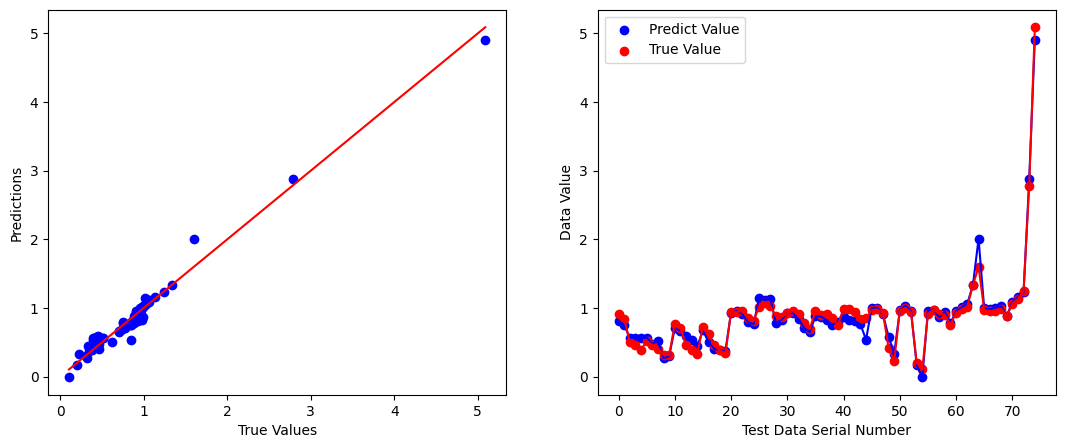

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(13,5))
# print(y_tests[best_index])
# 绘制对角线 y=x
plt.subplot(1,2,1)
plt.scatter(y, models[best_index].predict(ployfeats[best_index].fit_transform(X)),color='blue')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red') 

plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.subplot(1,2,2)
result = models[best_index].predict(ployfeats[best_index].fit_transform(X))
plt.scatter(range(len(result)),result,c="b",label="Predict Value")
plt.plot(range(len(result)),result,c='b')

plt.scatter(range(len(result)),y,c="r", label="True Value")
plt.plot(range(len(result)),y,c='r')
plt.xlabel('Test Data Serial Number')
plt.ylabel('Data Value')
plt.legend()
plt.show()